In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
# read flash.dat to a list of lists
# datContent = [i.strip().split() for i in open("./densZ0002680.dat").readlines()]
# df = pd.read_csv("./data/densX0000220.dat", sep=" ",  names=["X","Y","Z","dens"])
# data = np.array([df.X.values, df.Y.values, df.Z.values, df.dens.values])
df = pd.read_csv("./data/psi34.dat", sep=" ",  names=["X","Y","Z","dens"])
data = np.array([df.X.values, df.Y.values, df.dens.values])
Nx = 80
Ny = 80
Nz = 80
xr = max(data[0])
xl = min(data[0])
yr = max(data[1])
yl = min(data[1])
zr = xr#max(data[2])
zl = xl#min(data[2])
dx = (xr-xl)/Nx
dy = (yr-yl)/Ny
dz = (zr-zl)/Nz

In [2]:
print((Nx+1)**3)
df

531441


,X,Y,Z,dens
0,-5.0,-5.0,-5.000,9.947150e-115
1,-5.0,-5.0,-4.875,7.481460e-113
2,-5.0,-5.0,-4.750,5.043980e-111
3,-5.0,-5.0,-4.625,3.048310e-109
4,-5.0,-5.0,-4.500,1.651370e-107
...,...,...,...,...
531436,5.0,5.0,4.500,1.651370e-107
531437,5.0,5.0,4.625,3.048310e-109
531438,5.0,5.0,4.750,5.043980e-111
531439,5.0,5.0,4.875,7.481460e-113


In [3]:
def ijk(i, j, k, Nx, Ny, Nz):
    return [(((i) * (Ny + 1)) + (j)) * (Nz + 1) + (k)]

def gene_data(f, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz):
    data_gen = np.zeros((Nx+1)*(Ny+1)*(Nz+1))
    for i in range(Nx+1):
        for j in range(Ny+1):
            for k in range(Nz+1):
                data_gen[ijk(i, j, k, Nx, Ny, Nz)] = f(xl+i*dx, yl+j*dy, zl+k*dz)
    return data_gen

In [4]:
print([xl,dx,Nx,yl,dy,Ny,zl,dz,Nz])

[-5.0, 0.125, 80, -5.0, 0.125, 80, -5.0, 0.125, 80]


In [5]:
def get_normsimp(dd, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz):
    normz = np.zeros((Nx+1, Ny+1))
    normy = np.zeros((Nx+1))
    norm = 0
    for i in range(Nx+1):
        for j in range(Ny+1):
            normz[i,j] = dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+0] \
            + 2*sum(dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1):(((i) * (Ny + 1)) + (j)) * (Nz + 1)+Nz-2:2]) \
            + 4*sum(dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+1:(((i) * (Ny + 1)) + (j)) * (Nz + 1)+Nz-1:2]) \
            + dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+ Nz-1]

    for i in range(Nx+1):
        normy[i] = normz[i, 0] \
        + 2*sum(normz[i, :Ny-2:2]) \
        + 4*sum(normz[i, 1:Ny-1:2]) \
        + normz[i, Ny-1]

    norm = normy[0] \
    + 2*sum(normy[:Nx-2:2]) \
    + 4*sum(normy[1:Nx-1:2]) \
    + normy[Nx-1]

    return norm*dx*dy*dz/27

## test get_normsimp

In [6]:
omg = 7
pi = 4 * np.arctan(1)
f1 = lambda x, y, z: pow(np.exp(-omg*(x**2+y**2+z**2)/2)*pow(omg/pi,3/4),2)
f2 = lambda x, y, z: np.exp(-(x ** 2 + y ** 2 + z ** 2))

test_ana1 = gene_data(f1, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)
test_ana2 = gene_data(f2, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)

In [7]:
get_normsimp(test_ana1, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)

0.9999999996810381

In [44]:
integrate.tplquad(f1, xl, xr, yl, yr, zl, zr)

(1.0000000000000013, 1.4749921708438215e-08)

In [8]:
get_normsimp(test_ana2, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)

5.568327996630138

In [46]:
integrate.tplquad(f2, xl, xr, yl, yr, zl, zr)

(5.568327996806024, 1.4650679248701553e-08)

## Define analytical function

[0.9999999996810381, 0.8503991975601645, 1]
(81, 4)


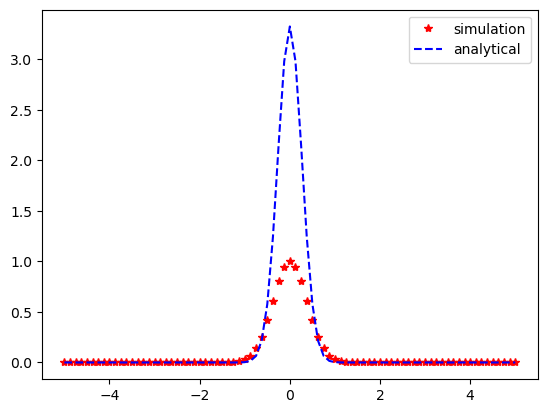

In [26]:
N = 1
omg = 7
pi = 4 * np.arctan(1)
norm = np.sqrt(N)*pow(omg/pi,3/4)
anaFunc = lambda x, y, z: np.exp(-omg*(x**2+y**2+z**2)/2)*norm

data_anal = gene_data(anaFunc, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)
print([get_normsimp(data_anal**2, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz), get_normsimp(df.dens, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz), N])

dfz = df[(df.X == 0)&(df.Y == 0)]
print(dfz.shape)
z= np.linspace(zl, zr, Nz+1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(z, dfz.dens, 'r*', label="simulation")
ax1.plot(z, anaFunc(0,0,z)**2, 'b--', label="analytical")
plt.legend()

In [14]:
df[(df.X == 0)&(df.Y == 0)&(df.Z == 0)]

,X,Y,Z,dens
265720,0.0,0.0,0.0,1.0


In [24]:
anaFunc(0,0,0)**2*np.sqrt(dx)

1.1759185936209313

In [13]:
norm

1.8237324493167395

In [16]:
pow(omg/pi,1/4)

1.2217632055191634